In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier

from scipy import stats

import math

import warnings
warnings.filterwarnings('ignore')

import wrangle as w
import model as m

In [3]:
#wrangle data, prep model_df with dummy_cols, split into train/validate/test
df = w.wrangle_wildlife_strike_df()
model_df = w.prep_w_strike_df_for_modeling(df)
train, validate, test = w.split_function(model_df, 'damage_level')

cached csv file found and read
Prepared df: (279942, 41)

Train: (167964, 41)
Validate: (55989, 41)
Test: (55989, 41)


In [4]:
# split into X, y for modeling
X_train, X_validate, X_test, y_train, y_validate, y_test, baseline_accuracy = m.get_X_y_baseline(train
                                                                                                 , validate
                                                                                                 , test
                                                                                                 , 'damage_level')

In [5]:
# Probably will be hard to beat .95 !!
baseline_accuracy

0.954037769998333

## Logistic Regression Models

In [15]:
results_df = m.get_multi_logit_scores(X_train, X_validate, y_train, y_validate)

In [13]:
results_df.columns = list(results_df.iloc[0])
results_df = results_df.iloc[1:]

In [16]:
results_df

,C,train_acc,val_acc,coef_ac_mass,coef_num_engs,coef_size_of_species_Medium,coef_size_of_species_Small,coef_size_of_species_Unknown,coef_ac_class_B,coef_ac_class_C,...,"coef_precipitation_Fog, Rain, Snow","coef_precipitation_Fog, Snow",coef_precipitation_None,"coef_precipitation_None, Rain","coef_precipitation_None, Rain, Snow","coef_precipitation_None, Snow",coef_precipitation_Rain,"coef_precipitation_Rain, Snow",coef_precipitation_Snow,coef_precipitation_Unknown
0,0.01,0.954038,0.954009,-0.276819,-0.067325,-0.075156,-0.139176,-0.018314,0.019061,-0.000094,...,-0.000011,-0.000022,-0.02281,-0.000034,-0.000008,-0.000087,-0.015573,-0.000063,-0.001072,0.032972
0,0.1,0.953865,0.954009,-0.485317,-0.183391,-0.463481,-0.761298,-0.264554,0.062558,-0.004075,...,-0.000089,-0.000183,-0.302534,-0.001506,-0.000127,-0.002835,-0.197119,-0.001341,-0.01713,0.062697
0,1.0,0.953835,0.953937,-0.50084,-0.309854,-0.701183,-1.190424,-0.38403,0.073634,-0.005702,...,-0.000115,-0.000249,-0.688042,-0.002368,-0.000175,-0.004897,-0.304668,-0.001938,-0.025622,-0.038018
0,10.0,0.953829,0.953937,-0.483445,-0.366335,-0.776588,-1.36462,-0.496573,0.08916,-0.007821,...,-0.000148,-0.000317,-0.684813,-0.003175,-0.000218,-0.006148,-0.376429,-0.002521,-0.032872,-0.043154
0,100.0,0.953835,0.953937,-0.512524,-0.324139,-0.727457,-1.231445,-0.372721,0.073766,-0.005409,...,-0.000112,-0.000244,-0.768673,-0.002326,-0.000173,-0.004922,-0.30585,-0.001878,-0.025283,-0.02674
0,1000.0,0.953817,0.953937,-0.491085,-0.309788,-0.728125,-1.23181,-0.366584,0.074017,-0.00532,...,-0.00011,-0.000241,-0.778298,-0.002287,-0.000171,-0.004885,-0.303764,-0.001853,-0.024958,-0.016115


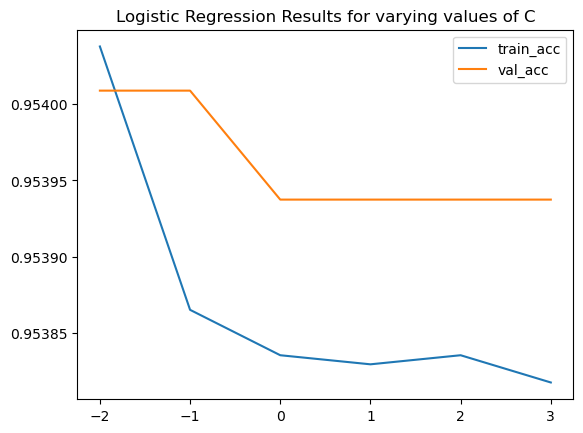

In [30]:
# plot the results_df
powers = [math.log10(x) for x in results_df.C]
plt.plot(powers, results_df.train_acc, label='train_acc')
plt.plot(powers, results_df.val_acc, label='val_acc')
plt.legend()
plt.title('Logistic Regression Results for varying values of C')
plt.show()

# C=.01 seems to be the best, although they're all pretty close

## KNN Models

In [37]:
## SO, KNN was taking a really long time to run even one model. Probably because I have 40 columns
## with all the dummy cols. I'll skip for now.

# results_df = m.get_knn_metrics(X_train, X_validate, y_train, y_validate, weights_='uniform', max_n=2)
# results_df

## Random Forest Models

In [6]:
# takes a long time. setting 3 and 3 took only about 5"
results_df = m.get_rf_scores(X_train, X_validate, y_train, y_validate, m_depth_range=5, m_s_leaf_range=5)
results_df
# no changes from min_samples_leaf 1-4 or max_depth 1-4

,min_samples_leaf,trn_acc_depth_1,val_acc_depth_1,diff_1,trn_acc_depth_2,val_acc_depth_2,diff_2,trn_acc_depth_3,val_acc_depth_3,diff_3,trn_acc_depth_4,val_acc_depth_4,diff_4,trn_acc_depth_5,val_acc_depth_5,diff_5
0,1,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011
1,2,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011
2,3,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011
3,4,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011
4,5,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011


In [7]:
results_df_entropy = m.get_rf_scores(X_train, X_validate, y_train, y_validate, crit='entropy', m_depth_range=5, m_s_leaf_range=5)
results_df_entropy
# no change

,min_samples_leaf,trn_acc_depth_1,val_acc_depth_1,diff_1,trn_acc_depth_2,val_acc_depth_2,diff_2,trn_acc_depth_3,val_acc_depth_3,diff_3,trn_acc_depth_4,val_acc_depth_4,diff_4,trn_acc_depth_5,val_acc_depth_5,diff_5
0,1,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011
1,2,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011
2,3,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011
3,4,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011
4,5,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011,0.954038,0.954027,0.000011


## Decision Tree Models

In [42]:
results_df = m.get_dtree_scores(X_train, X_validate, y_train, y_validate, crit='gini', max_d=10)
results_df

,max_depth,train_acc,val_acc,difference
1,1,0.954038,0.954027,0.000011
2,2,0.954038,0.954027,0.000011
3,3,0.954038,0.954027,0.000011
4,4,0.954038,0.954027,0.000011
5,5,0.954050,0.954062,-0.000013
6,6,0.954097,0.954009,0.000088
7,7,0.954425,0.954330,0.000094
8,8,0.954568,0.954384,0.000184
9,9,0.954663,0.954312,0.000350
10,10,0.954770,0.954241,0.000529


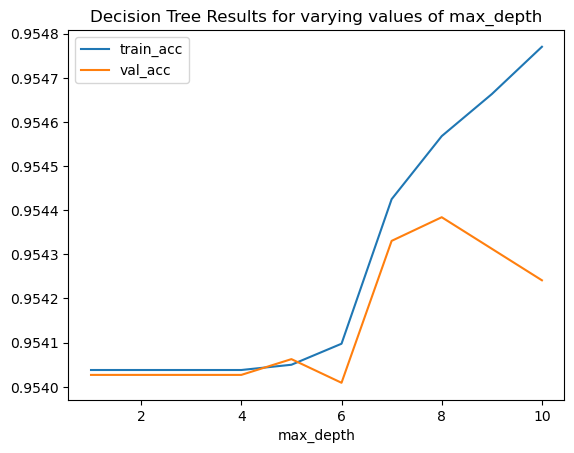

In [43]:
# plot the results_df
x_list = list(results_df.max_depth)
plt.plot(x_list, results_df.train_acc, label='train_acc')
plt.plot(x_list, results_df.val_acc, label='val_acc')
plt.legend()
plt.title('Decision Tree Results for varying values of max_depth')
plt.xlabel('max_depth')
plt.show()

# max_depth of 7 or 8 looks best

## What if I bring down the columns?

In [11]:
train.head()

,damage_level,ac_mass,num_engs,size_of_species_Medium,size_of_species_Small,size_of_species_Unknown,ac_class_B,ac_class_C,ac_class_J,ac_class_Y,...,"precipitation_Fog, Rain, Snow","precipitation_Fog, Snow",precipitation_None,"precipitation_None, Rain","precipitation_None, Rain, Snow","precipitation_None, Snow",precipitation_Rain,"precipitation_Rain, Snow",precipitation_Snow,precipitation_Unknown
date,,,,,,,,,,,,,,,,,,,,,
2004-07-02,N,4,2,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2018-05-20,N,4,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2004-07-14,N,4,2,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1996-02-25,S,4,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2013-07-14,N,0,-1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
subset_cols = ['ac_mass', 'num_engs', 'size_of_species_Medium', 'size_of_species_Small', 'size_of_species_Unknown'
               , 'ac_class_B  ', 'ac_class_C  ', 'ac_class_J  ', 'ac_class_Y  ', 'ac_class_Z']

In [16]:
X_tr_sb = X_train[subset_cols]
X_val_sb = X_validate[subset_cols]
X_test_sb = X_test[subset_cols]

## KNN Models

In [18]:
## Trying KNN again with fewer columns
## Still taking too long. AND results from this first run are underwhelming (.86)

results_df = m.get_knn_metrics(X_tr_sb, X_val_sb, y_train, y_validate, weights_='uniform', max_n=2)
results_df

,train_acc,val_acc
1,0.862613,0.863527
2,0.863512,0.864188


## What if I only try to predict among the rows that have M/S/D Damage levels?

In [20]:
#wrangle data, prep model_df with dummy_cols, split into train/validate/test
df = w.wrangle_wildlife_strike_df()
df[df.damage_level != 'N'].shape # only 12,867 rows
df = df[df.damage_level != 'N']

cached csv file found and read


In [21]:
model_df = w.prep_w_strike_df_for_modeling(df)
train, validate, test = w.split_function(model_df, 'damage_level')

Prepared df: (12867, 35)

Train: (7719, 35)
Validate: (2574, 35)
Test: (2574, 35)


In [22]:
# split into X, y for modeling
X_train, X_validate, X_test, y_train, y_validate, y_test, baseline_accuracy = m.get_X_y_baseline(train
                                                                                                 , validate
                                                                                                 , test
                                                                                                 , 'damage_level')

In [23]:
# Baseline accuracy is now .66
baseline_accuracy

0.6644643088482964

## Logistic Regression Models

In [24]:
results_df = m.get_multi_logit_scores(X_train, X_validate, y_train, y_validate)

In [25]:
results_df.columns = list(results_df.iloc[0])
results_df = results_df.iloc[1:]

In [26]:
results_df

,C,train_acc,val_acc,coef_ac_mass,coef_num_engs,coef_size_of_species_Medium,coef_size_of_species_Small,coef_size_of_species_Unknown,coef_ac_class_B,coef_ac_class_C,...,coef_phase_of_flight_Unknown,"coef_precipitation_Fog, Rain","coef_precipitation_Fog, Rain, Snow","coef_precipitation_Fog, Snow",coef_precipitation_None,"coef_precipitation_None, Rain",coef_precipitation_Rain,"coef_precipitation_Rain, Snow",coef_precipitation_Snow,coef_precipitation_Unknown
0,0.01,0.670553,0.671329,-0.244795,-0.12787,-0.095685,-0.041959,-0.013966,0.013013,-0.000352,...,-0.029879,-0.00087,-0.000044,0.0,-0.044248,0.0,-0.015953,-0.000094,-0.001657,0.060398
0,0.1,0.678067,0.679876,-0.34117,-0.099436,-0.413202,-0.255928,-0.172114,0.049574,-0.005977,...,-0.157277,-0.006078,-0.000258,0.0,-0.115229,0.0,-0.108701,-0.000631,-0.015309,0.205099
0,1.0,0.678715,0.680264,-0.245509,0.001412,-0.767006,-0.833113,-0.861522,0.322121,-0.04842,...,-0.597932,-0.038561,-0.001208,0.0,-0.385187,0.0,-0.653513,-0.004466,-0.122235,0.112931
0,10.0,0.678197,0.679487,-0.229496,0.011722,-0.841629,-1.059786,-1.183929,0.558799,-0.072096,...,-0.823369,-0.056191,-0.001704,0.0,-0.42577,0.0,-0.934172,-0.006539,-0.184956,0.049069
0,100.0,0.678715,0.682595,-0.238445,0.060744,-0.876565,-0.953293,-1.207738,0.816804,-0.085837,...,-0.904865,-0.068843,-0.002075,0.0,-0.3702,0.0,-1.03851,-0.007587,-0.228152,0.001153
0,1000.0,0.678585,0.679876,-0.258141,0.023846,-0.810602,-1.0023,-1.184339,0.689636,-0.077207,...,-0.851214,-0.060406,-0.00182,0.0,-0.420815,0.0,-0.970571,-0.006889,-0.200871,0.034658


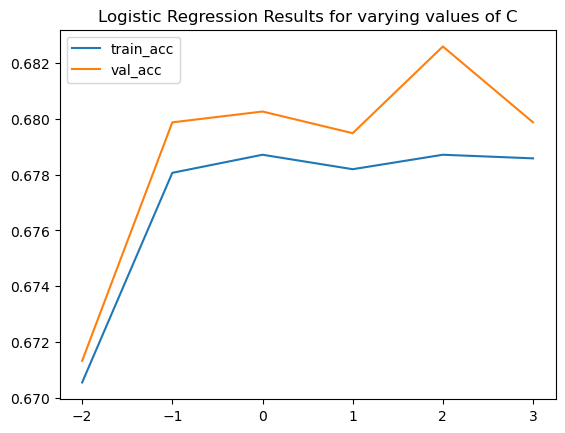

In [27]:
# plot the results_df
powers = [math.log10(x) for x in results_df.C]
plt.plot(powers, results_df.train_acc, label='train_acc')
plt.plot(powers, results_df.val_acc, label='val_acc')
plt.legend()
plt.title('Logistic Regression Results for varying values of C')
plt.show()

# C=1 seems to be the best, although they're all pretty close

## Random Forest Models

In [30]:
# takes a long time. setting 3 and 3 took only about 5"
results_df = m.get_rf_scores(X_train, X_validate, y_train, y_validate, m_depth_range=10, m_s_leaf_range=10)
results_df
# no changes from min_samples_leaf 1-4 or max_depth 1-4

,min_samples_leaf,trn_acc_depth_1,val_acc_depth_1,diff_1,trn_acc_depth_2,val_acc_depth_2,diff_2,trn_acc_depth_3,val_acc_depth_3,diff_3,...,diff_7,trn_acc_depth_8,val_acc_depth_8,diff_8,trn_acc_depth_9,val_acc_depth_9,diff_9,trn_acc_depth_10,val_acc_depth_10,diff_10
0,1,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,0.665889,0.665113,0.000777,...,0.006615,0.701127,0.689588,0.011539,0.703718,0.688034,0.015684,0.708900,0.686092,0.022808
1,2,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,0.665889,0.665113,0.000777,...,0.004283,0.696593,0.690754,0.005839,0.698407,0.686092,0.012315,0.700479,0.688811,0.011668
2,3,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,0.665889,0.665113,0.000777,...,0.000913,0.693872,0.687646,0.006227,0.696204,0.688423,0.007781,0.699054,0.688811,0.010243
3,4,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,0.665889,0.665113,0.000777,...,-0.000640,0.691411,0.687257,0.004154,0.694131,0.691531,0.002601,0.696463,0.689588,0.006875
4,5,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,0.665889,0.665113,0.000777,...,0.000134,0.691799,0.686480,0.005319,0.692836,0.690754,0.002082,0.694909,0.690754,0.004155
5,6,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,0.665889,0.665113,0.000777,...,-0.001547,0.689856,0.686092,0.003765,0.690763,0.689588,0.001175,0.693225,0.689977,0.003248
6,7,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,0.665889,0.665113,0.000777,...,0.000263,0.688949,0.685703,0.003246,0.692447,0.691142,0.001305,0.691281,0.689588,0.001693
7,8,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,0.665889,0.665113,0.000777,...,0.000263,0.689468,0.689200,0.000268,0.690504,0.690754,-0.000250,0.691152,0.688423,0.002729
8,9,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,0.665889,0.665113,0.000777,...,0.000524,0.688561,0.684926,0.003635,0.688820,0.688811,0.000009,0.691670,0.688811,0.002859
9,10,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,0.665889,0.665113,0.000777,...,-0.000771,0.688302,0.688034,0.000267,0.689986,0.688811,0.001175,0.688690,0.688811,-0.000121


In [31]:
results_df_entropy = m.get_rf_scores(X_train, X_validate, y_train, y_validate, crit='entropy', m_depth_range=10, m_s_leaf_range=10)
results_df_entropy
# no change

,min_samples_leaf,trn_acc_depth_1,val_acc_depth_1,diff_1,trn_acc_depth_2,val_acc_depth_2,diff_2,trn_acc_depth_3,val_acc_depth_3,diff_3,...,diff_7,trn_acc_depth_8,val_acc_depth_8,diff_8,trn_acc_depth_9,val_acc_depth_9,diff_9,trn_acc_depth_10,val_acc_depth_10,diff_10
0,1,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,...,0.002600,0.698147,0.692696,0.005451,0.703459,0.690754,0.012705,0.709807,0.686869,0.022938
1,2,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,...,0.000138,0.694520,0.692308,0.002212,0.697370,0.690754,0.006616,0.699313,0.689588,0.009725
2,3,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,...,0.000785,0.691152,0.687257,0.003895,0.695427,0.690365,0.005062,0.696722,0.688811,0.007911
3,4,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,...,-0.000121,0.691022,0.691531,-0.000509,0.693225,0.684926,0.008298,0.696593,0.689200,0.007393
4,5,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,...,0.000656,0.689856,0.689977,-0.000120,0.691799,0.691531,0.000269,0.694779,0.689977,0.004802
5,6,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,...,0.000655,0.689079,0.686092,0.002987,0.691540,0.691531,0.000010,0.691799,0.686869,0.004931
6,7,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,...,0.004023,0.685322,0.686092,-0.000770,0.688172,0.687646,0.000526,0.689727,0.686869,0.002858
7,8,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,...,0.003375,0.688820,0.688423,0.000397,0.689727,0.685703,0.004023,0.691411,0.691531,-0.000120
8,9,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,...,0.002598,0.679751,0.677545,0.002207,0.687783,0.687257,0.000526,0.688820,0.684926,0.003894
9,10,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,0.664464,0.664336,0.000129,...,0.002986,0.677808,0.677933,-0.000125,0.687395,0.683372,0.004023,0.687524,0.686869,0.000656


# Decision Tree

In [32]:
results_df = m.get_dtree_scores(X_train, X_validate, y_train, y_validate, crit='gini', max_d=10)
results_df

,max_depth,train_acc,val_acc,difference
1,1,0.672626,0.672494,0.000132
2,2,0.684286,0.683761,0.000525
3,3,0.685322,0.685703,-0.000381
4,4,0.688431,0.686092,0.002339
5,5,0.690893,0.688034,0.002858
6,6,0.693095,0.687646,0.005449
7,7,0.695427,0.686092,0.009335
8,8,0.703329,0.678710,0.024619
9,9,0.706827,0.682984,0.023844
10,10,0.711491,0.681041,0.030450


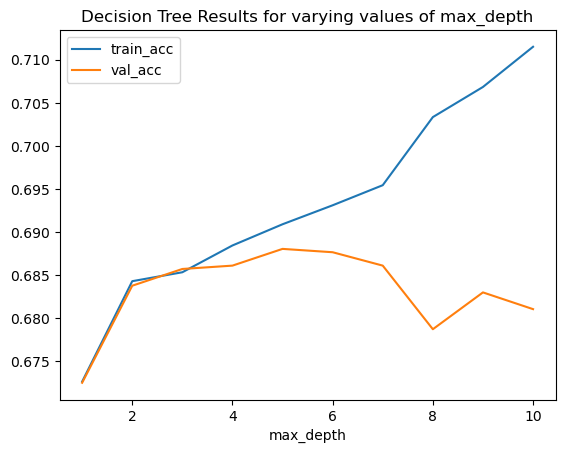

In [33]:
# plot the results_df
x_list = list(results_df.max_depth)
plt.plot(x_list, results_df.train_acc, label='train_acc')
plt.plot(x_list, results_df.val_acc, label='val_acc')
plt.legend()
plt.title('Decision Tree Results for varying values of max_depth')
plt.xlabel('max_depth')
plt.show()

# max_depth of 7 or 8 looks best

## KNN Models

In [34]:
results_df = m.get_knn_metrics(X_train, X_validate, y_train, y_validate, weights_='uniform', max_n=5)
results_df

,train_acc,val_acc
1,0.657598,0.597902
2,0.674181,0.648407
3,0.688949,0.646853
4,0.693484,0.675602
5,0.696593,0.653069


In [35]:
results_df = m.get_knn_metrics(X_train, X_validate, y_train, y_validate, weights_='distance', max_n=5)
results_df

,train_acc,val_acc
1,0.657598,0.597902
2,0.685322,0.647242
3,0.699313,0.648796
4,0.710714,0.674437
5,0.713305,0.654623


# BEST MODEL
* Random Forest with criterion = entropy, max_depth = 8, min_samples_leaf = 2
* train/validate accuracy: .69452 / .69231
* Baseline accuracy: .66446

In [36]:
# Run best model on test
rf = RandomForestClassifier(min_samples_leaf=2, random_state=42, max_depth = 8, criterion='entropy')
rf.fit(X_train, y_train)
train_acc = rf.score(X_train, y_train)
val_acc = rf.score(X_validate, y_validate)
test_acc = rf.score(X_test, y_test)
train_acc, val_acc, test_acc

(0.6945200155460551, 0.6923076923076923, 0.682983682983683)

In [ ]:
# Model predicts with .68298 accuracy on unseen data,
# beating the baseline of .66446 by a smidge.

# ---------- BREAK BREAK -----------
## Second iteration with removing all nulls and adding speed

In [2]:
#wrangle data, prep model_df with dummy_cols, split into train/validate/test
df = w.wrangle_wildlife_strike_df_mvp()
model_df = w.prep_w_strike_df_for_modeling_mvp(df)
train, validate, test = w.split_function(model_df, 'damage_level')

cached csv file found and read
Prepared df: (61955, 25)

Train: (37173, 25)
Validate: (12391, 25)
Test: (12391, 25)


In [3]:
# split into X, y for modeling
X_train, X_validate, X_test, y_train, y_validate, y_test, baseline_accuracy = m.get_X_y_baseline(train
                                                                                                 , validate
                                                                                                 , test
                                                                                                 , 'damage_level')

In [4]:
X_train.head()

,ac_mass,num_engs,precip_none,precip_rain,precip_fog,precip_snow,speed,size_of_species_Medium,size_of_species_Small,ac_class_B,...,phase_of_flight_Arrival,phase_of_flight_Climb,phase_of_flight_Departure,phase_of_flight_Descent,phase_of_flight_En Route,phase_of_flight_Landing Roll,phase_of_flight_Local,phase_of_flight_Parked,phase_of_flight_Take-off Run,phase_of_flight_Taxi
date,,,,,,,,,,,,,,,,,,,,,
2018-03-29,1,1,1,0,0,0,90.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1997-04-13,3,2,1,0,0,0,60.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2010-10-31,4,2,1,0,0,0,155.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2004-07-24,3,2,1,0,0,0,130.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2001-10-14,4,2,1,0,0,0,80.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
X_train_scaled, X_validate_scaled, X_test_scaled = w.get_minmax_scaled(X_train
                                                                       , X_validate
                                                                       , X_test
                                                                       , X_train.columns)

In [6]:
X_train_scaled.head()

,ac_mass,num_engs,precip_none,precip_rain,precip_fog,precip_snow,speed,size_of_species_Medium,size_of_species_Small,ac_class_B,...,phase_of_flight_Arrival,phase_of_flight_Climb,phase_of_flight_Departure,phase_of_flight_Descent,phase_of_flight_En Route,phase_of_flight_Landing Roll,phase_of_flight_Local,phase_of_flight_Parked,phase_of_flight_Take-off Run,phase_of_flight_Taxi
date,,,,,,,,,,,,,,,,,,,,,
2018-03-29,0.00,0.000000,1.0,0.0,0.0,0.0,0.138462,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-04-13,0.50,0.333333,1.0,0.0,0.0,0.0,0.092308,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2010-10-31,0.75,0.333333,1.0,0.0,0.0,0.0,0.238462,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-07-24,0.50,0.333333,1.0,0.0,0.0,0.0,0.200000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2001-10-14,0.75,0.333333,1.0,0.0,0.0,0.0,0.123077,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Commence with modeling: First All columns and all damage_levels (N/M/S/D)

In [11]:
baseline_accuracy

0.9213945605681543

## Logistic Regression Models

In [7]:
results_df = m.get_multi_logit_scores(X_train_scaled, X_validate_scaled, y_train, y_validate)

In [8]:
results_df.columns = list(results_df.iloc[0])
results_df = results_df.iloc[1:]

In [9]:
results_df

,C,train_acc,val_acc,coef_ac_mass,coef_num_engs,coef_precip_none,coef_precip_rain,coef_precip_fog,coef_precip_snow,coef_speed,...,coef_phase_of_flight_Arrival,coef_phase_of_flight_Climb,coef_phase_of_flight_Departure,coef_phase_of_flight_Descent,coef_phase_of_flight_En Route,coef_phase_of_flight_Landing Roll,coef_phase_of_flight_Local,coef_phase_of_flight_Parked,coef_phase_of_flight_Take-off Run,coef_phase_of_flight_Taxi
0,0.01,0.921314,0.921314,-0.027205,-0.009257,-0.003524,-0.004691,0.007965,-0.000376,-0.00421,...,-0.000003,0.002188,-0.000002,-0.000586,0.0,0.002369,-0.000105,-0.000005,0.019923,-0.000126
0,0.1,0.92239,0.920345,-0.222727,-0.076116,-0.023852,-0.047487,0.076614,-0.004519,-0.034396,...,-0.000016,0.017858,-0.00001,-0.0055,0.0,0.026375,-0.001045,-0.00005,0.178011,-0.001082
0,1.0,0.922282,0.919861,-1.03715,-0.323969,-0.53397,-0.682694,0.312322,-0.123595,-0.242705,...,-0.000052,0.179699,-0.000033,-0.025932,0.0,0.117483,-0.014924,-0.000578,0.873249,-0.013562
0,10.0,0.922363,0.9197,-1.542196,-0.491257,-1.004567,-1.295512,0.330469,-0.243978,-0.425264,...,-0.000105,0.302109,-0.000069,-0.03763,0.0,0.077829,-0.026427,-0.00095,1.294043,-0.025839
0,100.0,0.922282,0.919619,-1.680407,-0.49042,-1.08204,-1.458236,0.371263,-0.283151,-0.448796,...,-0.000115,0.401558,-0.000076,-0.041765,0.0,0.151804,-0.03053,-0.001064,1.35412,-0.028824
0,1000.0,0.922309,0.91978,-1.700738,-0.499984,-1.084188,-1.484676,0.372775,-0.287418,-0.455986,...,-0.000117,0.40684,-0.000077,-0.042287,0.0,0.145574,-0.030881,-0.001079,1.388103,-0.029386


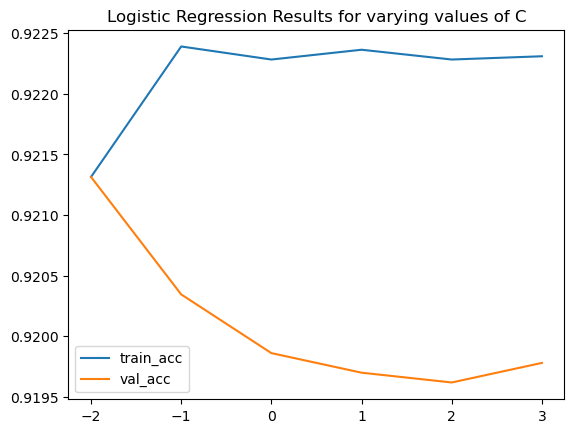

In [10]:
# plot the results_df
powers = [math.log10(x) for x in results_df.C]
plt.plot(powers, results_df.train_acc, label='train_acc')
plt.plot(powers, results_df.val_acc, label='val_acc')
plt.legend()
plt.title('Logistic Regression Results for varying values of C')
plt.show()

# C=.01 seems to be the best, although they're all pretty close

In [12]:
### No validate accuracy scores are better than baseline

## Random Forest

In [14]:
# takes a long time. setting 3 and 3 took only about 5"
results_df = m.get_rf_scores(X_train_scaled, X_validate_scaled, y_train, y_validate, m_depth_range=5, m_s_leaf_range=5)
results_df
# no changes from min_samples_leaf 1-4 or max_depth 1-4

,min_samples_leaf,trn_acc_depth_1,val_acc_depth_1,diff_1,trn_acc_depth_2,val_acc_depth_2,diff_2,trn_acc_depth_3,val_acc_depth_3,diff_3,trn_acc_depth_4,val_acc_depth_4,diff_4,trn_acc_depth_5,val_acc_depth_5,diff_5
0,1,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0
1,2,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0
2,3,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0
3,4,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0
4,5,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0


In [16]:
results_df_entropy = m.get_rf_scores(X_train_scaled, X_validate_scaled, y_train, y_validate, crit='entropy', m_depth_range=5, m_s_leaf_range=5)
results_df_entropy
# no change

,min_samples_leaf,trn_acc_depth_1,val_acc_depth_1,diff_1,trn_acc_depth_2,val_acc_depth_2,diff_2,trn_acc_depth_3,val_acc_depth_3,diff_3,trn_acc_depth_4,val_acc_depth_4,diff_4,trn_acc_depth_5,val_acc_depth_5,diff_5
0,1,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0
1,2,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0
2,3,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0
3,4,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0
4,5,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0,0.921395,0.921395,0.0


# Decision Tree

In [17]:
results_df = m.get_dtree_scores(X_train_scaled, X_validate_scaled, y_train, y_validate, crit='gini', max_d=10)
results_df

,max_depth,train_acc,val_acc,difference
1,1,0.921395,0.921395,0.000000
2,2,0.921395,0.921395,0.000000
3,3,0.921395,0.921395,0.000000
4,4,0.921798,0.921556,0.000242
5,5,0.921852,0.920910,0.000942
6,6,0.922605,0.919054,0.003551
7,7,0.923493,0.918973,0.004519
8,8,0.925107,0.918005,0.007102
9,9,0.926425,0.919054,0.007371
10,10,0.928174,0.914696,0.013478


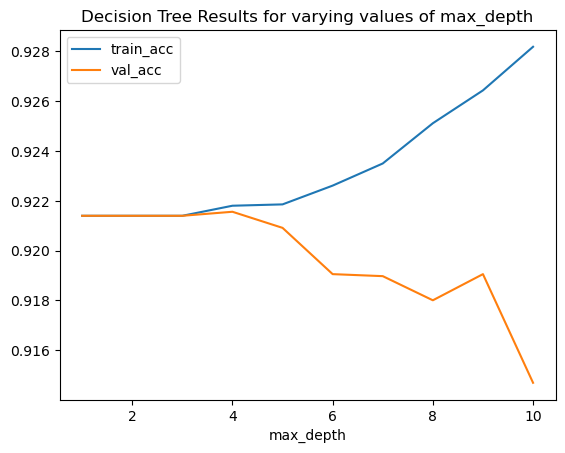

In [18]:
# plot the results_df
x_list = list(results_df.max_depth)
plt.plot(x_list, results_df.train_acc, label='train_acc')
plt.plot(x_list, results_df.val_acc, label='val_acc')
plt.legend()
plt.title('Decision Tree Results for varying values of max_depth')
plt.xlabel('max_depth')
plt.show()

# max_depth of 7 or 8 looks best

## KNN Models

In [19]:
results_df = m.get_knn_metrics(X_train_scaled, X_validate_scaled, y_train, y_validate, weights_='uniform', max_n=5)
results_df

,train_acc,val_acc
1,0.905819,0.870713
2,0.875259,0.846905
3,0.923278,0.906222
4,0.923762,0.907191
5,0.924730,0.912921


In [20]:
results_df = m.get_knn_metrics(X_train_scaled, X_validate_scaled, y_train, y_validate, weights_='distance', max_n=5)
results_df

,train_acc,val_acc
1,0.905819,0.870713
2,0.884298,0.848600
3,0.933796,0.902348
4,0.935464,0.903156
5,0.937266,0.906222


# Summary of all columns (with speed, scaled) and all damage levels:
- None of the models beat the baseline appreciably. Baseline was .92, i.e. 92% of the time an aircraft hits a bird it sustains no damage

# Second stage of modeling (4th stage really)
## What if I only try to predict among the rows that have M/S/D Damage levels?

In [22]:
#wrangle data, prep model_df with dummy_cols, split into train/validate/test
df = w.wrangle_wildlife_strike_df_mvp()
df[df.damage_level != 'N'].shape # only 4870 rows !
df = df[df.damage_level != 'N']

cached csv file found and read


In [23]:
model_df = w.prep_w_strike_df_for_modeling_mvp(df)
train, validate, test = w.split_function(model_df, 'damage_level')

Prepared df: (4870, 21)

Train: (2922, 21)
Validate: (974, 21)
Test: (974, 21)


In [24]:
# split into X, y for modeling
X_train, X_validate, X_test, y_train, y_validate, y_test, baseline_accuracy = m.get_X_y_baseline(train
                                                                                                 , validate
                                                                                                 , test
                                                                                                 , 'damage_level')

In [25]:
# Baseline accuracy is now .66
baseline_accuracy

0.6632443531827515

In [26]:
X_train_scaled, X_validate_scaled, X_test_scaled = w.get_minmax_scaled(X_train
                                                                       , X_validate
                                                                       , X_test
                                                                       , X_train.columns)

In [27]:
X_train_scaled.head()

,ac_mass,num_engs,precip_none,precip_rain,precip_fog,precip_snow,speed,size_of_species_Medium,size_of_species_Small,ac_class_B,type_eng_B,type_eng_C,type_eng_D,type_eng_F,phase_of_flight_Climb,phase_of_flight_Descent,phase_of_flight_Landing Roll,phase_of_flight_Local,phase_of_flight_Take-off Run,phase_of_flight_Taxi
date,,,,,,,,,,,,,,,,,,,,
2005-09-06,0.50,0.333333,1.0,0.0,0.0,0.0,0.310897,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1997-09-19,0.75,0.333333,1.0,0.0,0.0,0.0,0.455128,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-05-06,0.75,0.333333,0.0,0.0,1.0,0.0,0.358974,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1994-10-24,0.50,0.333333,1.0,0.0,0.0,0.0,0.487179,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2014-05-08,0.00,0.000000,1.0,0.0,0.0,0.0,0.294872,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Logistic Regression Models

In [28]:
results_df = m.get_multi_logit_scores(X_train_scaled, X_validate_scaled, y_train, y_validate)

In [29]:
results_df.columns = list(results_df.iloc[0])
results_df = results_df.iloc[1:]

In [30]:
results_df

,C,train_acc,val_acc,coef_ac_mass,coef_num_engs,coef_precip_none,coef_precip_rain,coef_precip_fog,coef_precip_snow,coef_speed,...,coef_type_eng_B,coef_type_eng_C,coef_type_eng_D,coef_type_eng_F,coef_phase_of_flight_Climb,coef_phase_of_flight_Descent,coef_phase_of_flight_Landing Roll,coef_phase_of_flight_Local,coef_phase_of_flight_Take-off Run,coef_phase_of_flight_Taxi
0,0.01,0.671116,0.669405,-0.014467,-0.001743,-0.002516,-0.005024,0.007563,-0.000523,-0.00622,...,-0.000288,0.019592,-0.014922,-0.000327,-0.000925,-0.00069,0.023531,-0.000047,0.009269,0.0
0,0.1,0.693018,0.707392,-0.120225,-0.010487,-0.022154,-0.048654,0.072658,-0.005885,-0.048871,...,-0.003078,0.162791,-0.098449,-0.003648,-0.000376,-0.005255,0.210461,-0.000479,0.085667,0.0
0,1.0,0.696783,0.702259,-0.704654,-0.016674,-0.091235,-0.367063,0.457996,-0.074142,-0.129687,...,-0.02806,0.637513,0.047419,-0.022098,0.255136,-0.022769,0.997362,-0.002958,0.552292,0.0
0,10.0,0.696441,0.698152,-2.201037,-0.169948,-0.518612,-1.598668,0.437451,-0.552397,-0.147536,...,-0.103391,1.292515,0.964197,-0.088818,1.133936,-0.051975,1.948932,-0.013983,1.429504,0.0
0,100.0,0.696783,0.698152,-3.025663,-0.331004,-0.801728,-3.025432,0.208245,-0.977377,-0.504697,...,-0.168775,1.761814,1.545539,-0.163862,2.036703,-0.081917,2.770519,-0.026032,2.302667,0.0
0,1000.0,0.695756,0.698152,-3.051392,-0.298706,-0.8485,-3.173774,0.222312,-0.962917,-0.767759,...,-0.168997,1.776467,1.573113,-0.168089,2.073556,-0.08361,2.808028,-0.027031,2.384184,0.0


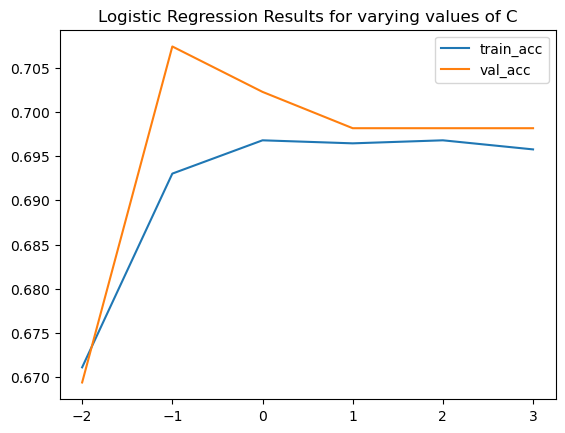

In [31]:
# plot the results_df
powers = [math.log10(x) for x in results_df.C]
plt.plot(powers, results_df.train_acc, label='train_acc')
plt.plot(powers, results_df.val_acc, label='val_acc')
plt.legend()
plt.title('Logistic Regression Results for varying values of C')
plt.show()

# C=1 seems to be the best, although they're all pretty close

## Random Forest Models

In [32]:
# takes a long time. setting 3 and 3 took only about 5"
results_df = m.get_rf_scores(X_train_scaled, X_validate_scaled, y_train, y_validate, m_depth_range=10, m_s_leaf_range=10)
results_df
# no changes from min_samples_leaf 1-4 or max_depth 1-4

,min_samples_leaf,trn_acc_depth_1,val_acc_depth_1,diff_1,trn_acc_depth_2,val_acc_depth_2,diff_2,trn_acc_depth_3,val_acc_depth_3,diff_3,...,diff_7,trn_acc_depth_8,val_acc_depth_8,diff_8,trn_acc_depth_9,val_acc_depth_9,diff_9,trn_acc_depth_10,val_acc_depth_10,diff_10
0,1,0.663244,0.663244,0.0,0.663244,0.663244,0.0,0.668720,0.665298,0.003422,...,0.018823,0.724846,0.699179,0.025667,0.745722,0.697125,0.048597,0.759069,0.691992,0.067077
1,2,0.663244,0.663244,0.0,0.663244,0.663244,0.0,0.673169,0.671458,0.001711,...,0.019165,0.718344,0.695072,0.023272,0.731006,0.690965,0.040041,0.736482,0.688912,0.047570
2,3,0.663244,0.663244,0.0,0.663244,0.663244,0.0,0.672142,0.670431,0.001711,...,0.012663,0.711157,0.697125,0.014031,0.718344,0.699179,0.019165,0.724162,0.687885,0.036277
3,4,0.663244,0.663244,0.0,0.663244,0.663244,0.0,0.674196,0.672485,0.001711,...,0.010609,0.707392,0.691992,0.015400,0.712868,0.693018,0.019849,0.716290,0.683778,0.032512
4,5,0.663244,0.663244,0.0,0.663244,0.663244,0.0,0.674538,0.671458,0.003080,...,0.003422,0.701916,0.698152,0.003765,0.709103,0.698152,0.010951,0.713895,0.693018,0.020876
5,6,0.663244,0.663244,0.0,0.663244,0.663244,0.0,0.680698,0.674538,0.006160,...,0.001027,0.702601,0.688912,0.013689,0.703970,0.696099,0.007871,0.707734,0.687885,0.019849
6,7,0.663244,0.663244,0.0,0.663244,0.663244,0.0,0.675907,0.669405,0.006502,...,0.006502,0.699521,0.687885,0.011636,0.704312,0.695072,0.009240,0.703628,0.696099,0.007529
7,8,0.663244,0.663244,0.0,0.663244,0.663244,0.0,0.679329,0.673511,0.005818,...,0.002396,0.702601,0.693018,0.009582,0.700548,0.701232,-0.000684,0.703970,0.697125,0.006845
8,9,0.663244,0.663244,0.0,0.663244,0.663244,0.0,0.682409,0.676591,0.005818,...,0.001027,0.698152,0.698152,0.000000,0.698836,0.697125,0.001711,0.699521,0.700205,-0.000684
9,10,0.663244,0.663244,0.0,0.663244,0.663244,0.0,0.674196,0.668378,0.005818,...,0.003422,0.698152,0.697125,0.001027,0.696441,0.697125,-0.000684,0.700205,0.698152,0.002053


In [33]:
results_df_entropy = m.get_rf_scores(X_train_scaled, X_validate_scaled, y_train, y_validate, crit='entropy', m_depth_range=10, m_s_leaf_range=10)
results_df_entropy
# no change

,min_samples_leaf,trn_acc_depth_1,val_acc_depth_1,diff_1,trn_acc_depth_2,val_acc_depth_2,diff_2,trn_acc_depth_3,val_acc_depth_3,diff_3,...,diff_7,trn_acc_depth_8,val_acc_depth_8,diff_8,trn_acc_depth_9,val_acc_depth_9,diff_9,trn_acc_depth_10,val_acc_depth_10,diff_10
0,1,0.663244,0.663244,0.0,0.663244,0.663244,0.0,0.675222,0.669405,0.005818,...,0.019165,0.728953,0.700205,0.028747,0.746749,0.693018,0.053730,0.763518,0.686858,0.076660
1,2,0.663244,0.663244,0.0,0.663244,0.663244,0.0,0.679329,0.673511,0.005818,...,0.013689,0.717659,0.689938,0.027721,0.728268,0.691992,0.036277,0.742300,0.684805,0.057495
2,3,0.663244,0.663244,0.0,0.663244,0.663244,0.0,0.677618,0.674538,0.003080,...,0.008214,0.712183,0.698152,0.014031,0.719028,0.698152,0.020876,0.723135,0.691992,0.031143
3,4,0.663244,0.663244,0.0,0.663244,0.663244,0.0,0.675565,0.671458,0.004107,...,0.008214,0.711841,0.690965,0.020876,0.712183,0.698152,0.014031,0.716975,0.690965,0.026010
4,5,0.663244,0.663244,0.0,0.663244,0.663244,0.0,0.675565,0.671458,0.004107,...,0.002738,0.700890,0.696099,0.004791,0.707734,0.685832,0.021903,0.711157,0.686858,0.024298
5,6,0.663244,0.663244,0.0,0.663244,0.663244,0.0,0.675907,0.671458,0.004449,...,0.002738,0.701232,0.697125,0.004107,0.702601,0.697125,0.005476,0.710472,0.687885,0.022587
6,7,0.663244,0.663244,0.0,0.663244,0.663244,0.0,0.679671,0.673511,0.006160,...,0.000342,0.699521,0.696099,0.003422,0.700890,0.700205,0.000684,0.703970,0.688912,0.015058
7,8,0.663244,0.663244,0.0,0.663244,0.663244,0.0,0.678987,0.673511,0.005476,...,0.005133,0.697810,0.695072,0.002738,0.698836,0.698152,0.000684,0.700205,0.694045,0.006160
8,9,0.663244,0.663244,0.0,0.663244,0.663244,0.0,0.680356,0.673511,0.006845,...,-0.001027,0.697810,0.699179,-0.001369,0.696099,0.696099,0.000000,0.698494,0.699179,-0.000684
9,10,0.663244,0.663244,0.0,0.663244,0.663244,0.0,0.679329,0.674538,0.004791,...,-0.000342,0.697125,0.697125,0.000000,0.698152,0.700205,-0.002053,0.697810,0.699179,-0.001369


# Decision Tree

In [34]:
results_df = m.get_dtree_scores(X_train_scaled, X_validate_scaled, y_train, y_validate, crit='gini', max_d=10)
results_df

,max_depth,train_acc,val_acc,difference
1,1,0.687543,0.691992,-0.004449
2,2,0.692334,0.700205,-0.007871
3,3,0.693018,0.698152,-0.005133
4,4,0.695756,0.699179,-0.003422
5,5,0.700548,0.690965,0.009582
6,6,0.710472,0.706366,0.004107
7,7,0.722450,0.689938,0.032512
8,8,0.733402,0.689938,0.043463
9,9,0.744011,0.693018,0.050992
10,10,0.756674,0.670431,0.086242


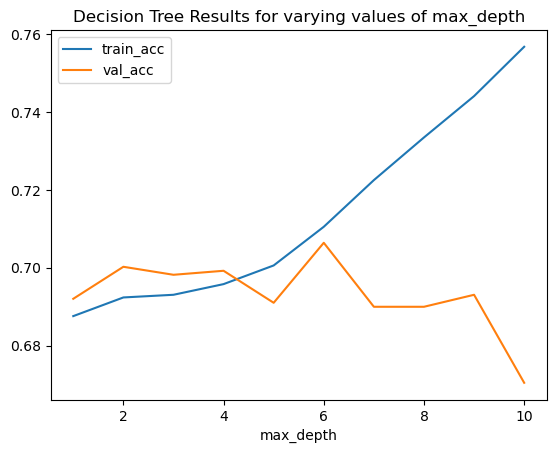

In [35]:
# plot the results_df
x_list = list(results_df.max_depth)
plt.plot(x_list, results_df.train_acc, label='train_acc')
plt.plot(x_list, results_df.val_acc, label='val_acc')
plt.legend()
plt.title('Decision Tree Results for varying values of max_depth')
plt.xlabel('max_depth')
plt.show()

# max_depth of 7 or 8 looks best

## KNN Models

In [36]:
results_df = m.get_knn_metrics(X_train_scaled, X_validate_scaled, y_train, y_validate, weights_='uniform', max_n=5)
results_df

,train_acc,val_acc
1,0.815880,0.629363
2,0.758042,0.669405
3,0.768309,0.651951
4,0.747433,0.668378
5,0.750856,0.662218


In [37]:
results_df = m.get_knn_metrics(X_train_scaled, X_validate_scaled, y_train, y_validate, weights_='distance', max_n=5)
results_df

,train_acc,val_acc
1,0.815880,0.629363
2,0.826831,0.651951
3,0.840520,0.637577
4,0.843258,0.650924
5,0.845996,0.644764


# BEST MODEL
* Decision Tree with criterion = 'gini', max_depth = 6
* train/validate accuracy: .710472 / .706366
* Baseline accuracy: .663244

In [38]:
# Run best model on test
tree = DecisionTreeClassifier(max_depth=6, criterion='gini')
tree.fit(X_train_scaled, y_train)
train_acc = tree.score(X_train_scaled, y_train)
val_acc = tree.score(X_validate_scaled, y_validate)
test_acc = tree.score(X_test_scaled, y_test)
train_acc, val_acc, test_acc

(0.7104722792607803, 0.7073921971252567, 0.6930184804928131)

In [ ]:
# Model predicts with .693 accuracy on unseen data,
# beating the baseline of .663 by 3%